- TO detect outliers 
   1) Box plot 
   2) scatter plot
   3) z-score
   4) IQR

- To delete or filter the outliers:
 1) z-score
 2) IQR

### Which machine learning algorithm is  impacted by outliers
1. Naive Bayes algorithm ------- Not Sensitive
2. SVM ------------------------- Not Sensitive
3. Linear regression ----------- Sensitive
4. Logistic regression --------- Sensitive 
5. Decison tree regreessor OR classifier ------ Not Sensitive 
6. Ensemble techniques (RF , Boosting techniques) --------- Not sensitive 
7. KNN --------------------- if k value is high , this model is robust to outlier
8. KMeans ------------------- Sensitive
9. Hierarchical ------------- Sensitive 
10. PCA --------------------- Sensitive 
11. Neural Network ---------- Sensitive 

In [2]:
import pandas as pd
df = pd.read_csv('titanic-train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

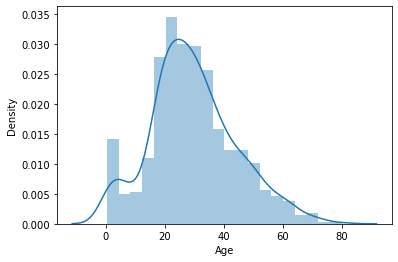

In [12]:
import seaborn as sns
sns.distplot(df['Age'].dropna())

### we are simply adding outliers to Age column

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

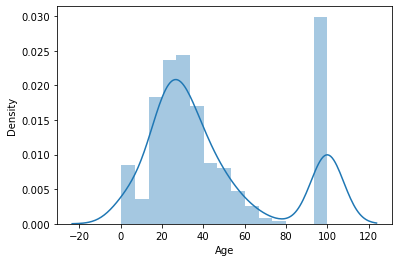

In [13]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'number of passengers')

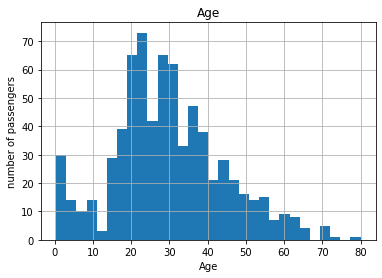

In [14]:
plot = df.Age.hist(bins = 30)
plot.set_title("Age")
plot.set_xlabel("Age")
plot.set_ylabel("number of passengers")

###  The above data follows nearly the gaussian distribution

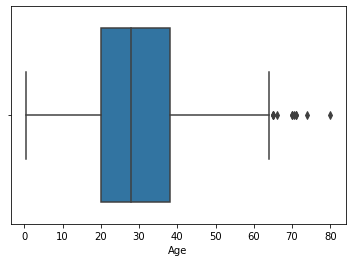

In [19]:
fig = sns.boxplot(x = df['Age'] , orient="H")

In [21]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [31]:
# Assuming the data follows the gaussian distribution , we are calculating the boundaries which will differentiate the outliers
upper_boundary = df['Age'].mean() + 3*df["Age"].std()
lower_boundary = df['Age'].mean() - 3*df["Age"].std()
mean = df['Age'].mean()
print("upper_bound : {} , lower_bound : {}  , mean : {} ".format(upper_boundary , lower_boundary , mean))

upper_bound : 73.27860964406095 , lower_bound : -13.88037434994331  , mean : 29.69911764705882 


In [34]:
# lets computer the IQR 
IQR = df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
IQR

17.875

In [39]:
# now we have to calculate the upper edge and lower edge 
lower_edge = df['Age'].quantile(0.25) - (IQR*1.5)
upper_edge = df['Age'].quantile(0.75) + (IQR*1.5)
print(lower_edge)  

print(upper_edge)

-6.6875
64.8125


In [41]:
# Exterme outliers 
lower_edge = df['Age'].quantile(0.25) - (IQR*3)
upper_edge = df['Age'].quantile(0.75) + (IQR*3)
print(lower_edge)  

print(upper_edge)

-33.5
91.625


####  Fare

Text(0, 0.5, 'number of passengers')

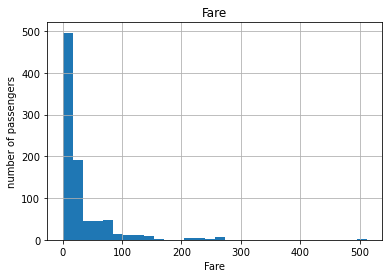

In [42]:
plot = df.Fare.hist(bins = 30)
plot.set_title("Fare")
plot.set_xlabel("Fare")
plot.set_ylabel("number of passengers")

###  So now here the data is right skewed 

<AxesSubplot:xlabel='Fare'>

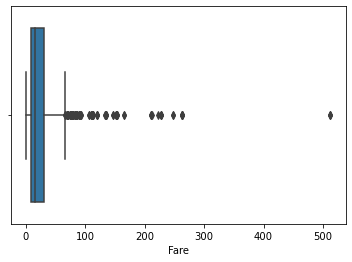

In [44]:
sns.boxplot(x = df["Fare"])

In [45]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [46]:
# Lets computes the IQR
IQR_fare = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
IQR_fare

23.0896

In [47]:
# Exterme outliers 
lower_edge = df['Fare'].quantile(0.25) - (IQR_fare*3)
upper_edge = df['Fare'].quantile(0.75) + (IQR_fare*3)
print(lower_edge)  

print(upper_edge)

-61.358399999999996
100.2688


In [49]:
data = df.copy()
data.loc[data['Age'] > 73 , 'Age'] = 73
data.loc[data['Fare'] > 100 , 'Fare'] = 100

Text(0, 0.5, 'number of passengers')

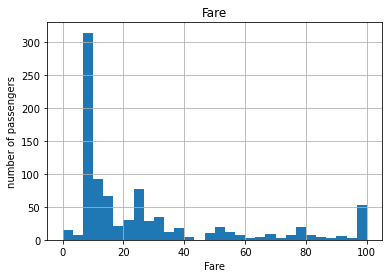

In [50]:
plot = data.Fare.hist(bins = 30)
plot.set_title("Fare")
plot.set_xlabel("Fare")
plot.set_ylabel("number of passengers")

#### Earliere we have a fare upto 500 , but after handling the outliers , fare will be upto 100 only 

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model  import LogisticRegression
from sklearn.metrics import accuracy_score  , roc_auc_score

x_train , x_test , y_train , y_test = train_test_split(data[['Age','Fare']].fillna(0) , data['Survived'] , test_size=0.3)

In [58]:
y_prd_prob

array([[0.67934678, 0.32065322],
       [0.71709898, 0.28290102],
       [0.62226351, 0.37773649],
       [0.73465839, 0.26534161],
       [0.20442244, 0.79557756],
       [0.71880749, 0.28119251],
       [0.52940665, 0.47059335],
       [0.71867629, 0.28132371],
       [0.33278791, 0.66721209],
       [0.74209924, 0.25790076],
       [0.73640194, 0.26359806],
       [0.71878545, 0.28121455],
       [0.7197497 , 0.2802503 ],
       [0.61419589, 0.38580411],
       [0.21394952, 0.78605048],
       [0.72340734, 0.27659266],
       [0.75187038, 0.24812962],
       [0.73654906, 0.26345094],
       [0.3397883 , 0.6602117 ],
       [0.63373037, 0.36626963],
       [0.73408283, 0.26591717],
       [0.73635922, 0.26364078],
       [0.72261177, 0.27738823],
       [0.71342073, 0.28657927],
       [0.72932329, 0.27067671],
       [0.60615988, 0.39384012],
       [0.71342073, 0.28657927],
       [0.71878545, 0.28121455],
       [0.74642491, 0.25357509],
       [0.67657449, 0.32342551],
       [0.

In [59]:
# now built the simple model 

clf = LogisticRegression()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
y_prd_prob = clf.predict_proba(x_test)

print("acc: - " , accuracy_score(y_test , y_pred))
print("roc: - " , roc_auc_score(y_test , y_prd_prob[:,1]))


acc: -  0.6567164179104478
roc: -  0.6861751688795714


In [60]:
# now built the ensemble model 
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
y_prd_prob = clf.predict_proba(x_test)

print("acc: - " , accuracy_score(y_test , y_pred))
print("roc: - " , roc_auc_score(y_test , y_prd_prob[:,1]))


acc: -  0.6604477611940298
roc: -  0.7303167947822036
